# Operating on Data in Pandas

* for unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output.
* for binary operations such as addition and multiplication, Pandas will automatically align indices when passing the objects to the ufunc.

# A. Ufuncs: Index Preservation

In [1]:
import pandas as pd
import numpy as np

In [2]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0, 10, 4))
ser

0    0
1    7
2    6
3    4
dtype: int64

In [3]:
df = pd.DataFrame(rng.integers(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,4,8,0,6
1,2,0,5,9
2,7,7,7,7


In [4]:
np.exp(ser)

0       1.000000
1    1096.633158
2     403.428793
3      54.598150
dtype: float64

In [5]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.224647e-16,-2.449294e-16,0.000000,-1.000000
1,1.000000e+00,0.000000e+00,-0.707107,0.707107
2,-7.071068e-01,-7.071068e-01,-0.707107,-0.707107


# B. Ufuncs: Index Alignment

* For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with incomplete data:

### B.1. Index Alignment in Series:


In [6]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 39538223, 'Texas': 29145505, 'Florida': 21538187}, name='population')

In [7]:
population / area

Alaska              NaN
California    93.257784
Florida             NaN
Texas         41.896072
dtype: float64

In [8]:
area.index.union(population.index)

Index(['Alaska', 'California', 'Florida', 'Texas'], dtype='object')

In [9]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [10]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### B.2. Index Alignment in DataFrames:

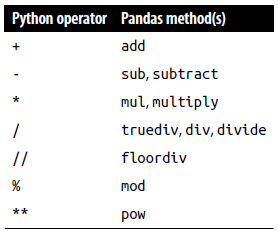

In [11]:
A = pd.DataFrame(rng.integers(0, 20, (2, 2)), columns=['a', 'b'])
A

,a,b
0,10,2
1,16,9


In [12]:
B = pd.DataFrame(rng.integers(0, 10, (3, 3)), columns=['b', 'a', 'c'])
B

,b,a,c
0,5,3,1
1,9,7,6
2,4,8,5


In [13]:
A + B

,a,b,c
0,13.0,7.0,NaN
1,23.0,18.0,NaN
2,NaN,NaN,NaN


In [14]:
A.add(B, fill_value=A.values.mean())

,a,b,c
0,13.00,7.00,10.25
1,23.00,18.00,15.25
2,17.25,13.25,14.25


# C. Ufuncs: Operations Between DataFrames and Series

* When performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained, and the result is similar to operations between a two-dimensional and one-dimensional NumPy array

In [15]:
A = rng.integers(10, size=(3, 4))
A

array([[4, 4, 2, 0],
       [5, 8, 0, 8],
       [8, 2, 6, 1]], dtype=int64)

In [16]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 1,  4, -2,  8],
       [ 4, -2,  4,  1]], dtype=int64)

In [17]:
df = pd.DataFrame(A, columns=['Q', 'R', 'S', 'T'])
df

,Q,R,S,T
0,4,4,2,0
1,5,8,0,8
2,8,2,6,1


In [18]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,1,4,-2,8
2,4,-2,4,1


In [19]:
#Column wise
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,0,0,-2,-4
1,-3,0,-8,0
2,6,0,4,-1


In [20]:
halfrow = df.iloc[0, ::2]
halfrow

Q    4
S    2
Name: 0, dtype: int64

In [21]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,1.0,NaN,-2.0,NaN
2,4.0,NaN,4.0,NaN
